In [25]:
import neonutilities as nu
import duckdb
import matplotlib.pyplot as plt
import datetime

In [3]:
mamds = nu.dataset_query(dpid="DP1.10072.001", 
                         site="TREE", package="basic",
                         tabl="mam_pertrapnight",
                         release="RELEASE-2025")

In [4]:
con = duckdb.connect()
mamTREE = con.execute('''
                      SELECT DISTINCT tagID, taxonID, scientificName 
                      FROM mamds WHERE taxonID != ''
                      ''').df()

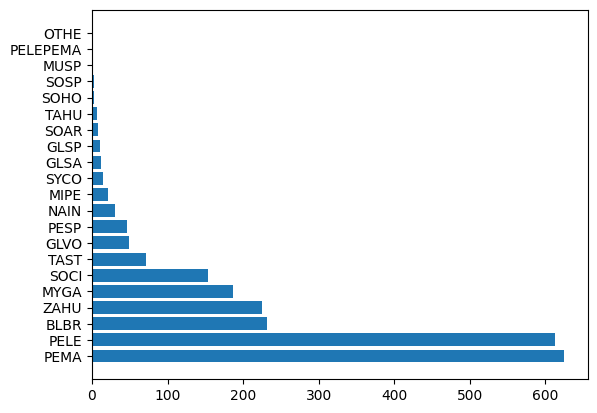

In [5]:
ct = mamTREE.taxonID.value_counts()

fig, ax = plt.subplots()
ax.barh(y=ct.keys(), width=ct)
plt.show()

In [6]:
pthds = nu.dataset_query(dpid="DP1.10064.002", 
                         site="TREE", package="basic",
                         tabl="rpt2_pathogentesting",
                         release="RELEASE-2025")

In [20]:
mampath = con.execute('''
                      SELECT 
                        tagID, taxonID, scientificName, bloodSampleID, pthds.*
                      FROM mamds 
                      INNER JOIN pthds 
                      ON mamds.bloodSampleID = pthds.sampleID 
                      WHERE testResult = 'Positive'
                      ''').df()

mampath.scientificName.value_counts()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

scientificName
Peromyscus leucopus       74
Peromyscus maniculatus    63
Zapus hudsonius            8
Name: count, dtype: int64

In [8]:
swds = nu.dataset_query(dpid="DP1.00094.001", 
                         site="SJER", package="basic",
                         hor="004", ver="502",
                         startdate="2023-01", enddate="2023-12",
                         tabl="SWS_30_minute",
                         release="RELEASE-2025")

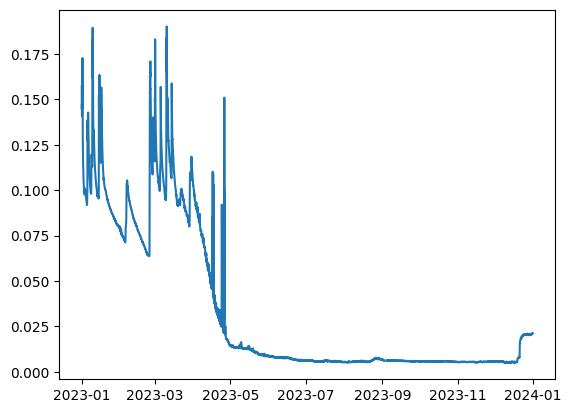

In [9]:
swSJER = con.execute("SELECT * FROM swds").df()

fig, ax = plt.subplots()
ax.plot(swSJER.endDateTime, swSJER.VSWCMean)
plt.show()

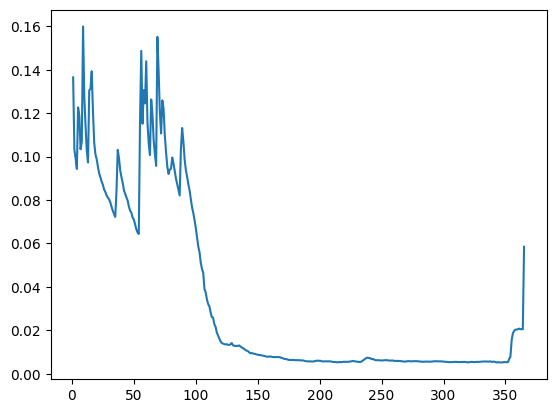

In [10]:
swmean = con.execute('''
                     SELECT 
                        EXTRACT(DAYOFYEAR FROM endDateTime) AS dat,
                        AVG(VSWCMean) AS swdaily
                     FROM swds 
                     WHERE VSWCFinalQF = 0 
                     GROUP BY 
                        EXTRACT(DAYOFYEAR FROM endDateTime)
                     ORDER BY dat
                     ''').df()

fig, ax = plt.subplots()
ax.plot(swmean.dat, swmean.swdaily)
plt.show()

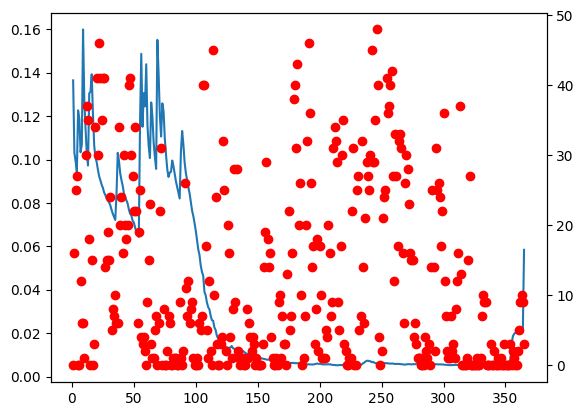

In [11]:
swmeanf = con.execute('''
                     SELECT 
                        EXTRACT(DAYOFYEAR FROM endDateTime) AS dat,
                        SUM(flagabs) AS flagdaily
                     FROM (SELECT 
                              endDateTime,
                              ABS(VSWCFinalQF) AS flagabs
                           FROM swds)
                     GROUP BY 
                        EXTRACT(DAYOFYEAR FROM endDateTime)
                     ORDER BY dat
                     ''').df()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(swmean.dat, swmean.swdaily)
ax2.scatter(swmeanf.dat, swmeanf.flagdaily, c='r')
plt.show()

In [15]:
tagdups = (mamTREE.groupby('tagID')
           .filter(lambda x: len(x) > 1)
           .sort_values('tagID')
           .reset_index(drop=True))
tagdups.head(10)

,tagID,taxonID,scientificName
0,NEON.MAM.D05.L1808,PEMA,Peromyscus maniculatus
1,NEON.MAM.D05.L1808,PELE,Peromyscus leucopus
2,NEON.MAM.D05.L3692,PELE,Peromyscus leucopus
3,NEON.MAM.D05.L3692,PEMA,Peromyscus maniculatus
4,NEON.MAM.D05.L6026,GLVO,Glaucomys volans
5,NEON.MAM.D05.L6026,GLSA,Glaucomys sabrinus
6,NEON.MAM.D05.L6026,GLSP,Glaucomys sp.
7,NEON.MAM.D05.L7847,PELE,Peromyscus leucopus
8,NEON.MAM.D05.L7847,PEMA,Peromyscus maniculatus
9,NEON.MAM.D05.R1395,PEMA,Peromyscus maniculatus


In [22]:
pathdups = (mampath.groupby('tagID')
            .filter(lambda x: len(x) > 1)
            .reset_index(drop=True)
            .loc[:, ['tagID', 'scientificName', 'collectDate', 'testPathogenName']]
            .sort_values(['tagID', 'collectDate'])
           )
pathdups.head(21)

,tagID,scientificName,collectDate,testPathogenName
42,NEON.MAM.D05.L7097,Zapus hudsonius,2021-06-16,Anaplasma phagocytophilum
43,NEON.MAM.D05.L7097,Zapus hudsonius,2021-06-16,Babesia microti
37,NEON.MAM.D05.L8759,Peromyscus leucopus,2023-09-14,Ehrlichia muris-like
38,NEON.MAM.D05.L8759,Peromyscus leucopus,2023-09-14,Babesia microti
18,NEON.MAM.D05.R6010,Peromyscus maniculatus,2020-09-23,Babesia divergens
19,NEON.MAM.D05.R6010,Peromyscus maniculatus,2020-09-23,Ehrlichia muris-like
9,NEON.MAM.D05.R6349,Peromyscus leucopus,2020-07-29,Anaplasma phagocytophilum
10,NEON.MAM.D05.R6349,Peromyscus leucopus,2020-07-29,Babesia microti
11,NEON.MAM.D05.R6540,Peromyscus maniculatus,2020-07-30,Babesia microti
12,NEON.MAM.D05.R6540,Peromyscus maniculatus,2020-07-30,Babesia divergens


In [30]:
starttime = datetime.datetime.now()

wcds = nu.dataset_query(dpid="DP1.20093.001", 
                         site="MCRA", package="basic",
                         tabl="swc_externalLabDataByAnalyte",
                         release="RELEASE-2025")
                         
print(datetime.datetime.now() - starttime)

tn = con.execute('''
                 SELECT * FROM wcds
                 WHERE analyte = 'TN'
                 ''').df()

print(datetime.datetime.now() - starttime)

0:00:05.684404


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

0:00:09.176819


In [36]:
starttime = datetime.datetime.now()

wclist = nu.load_by_product(dpid="DP1.20093.001", 
                            site="MCRA", package="basic",
                            check_size=False, progress=False,
                            release="RELEASE-2025")

print(datetime.datetime.now() - starttime)

waterchem = wclist['swc_externalLabDataByAnalyte']
tnl = waterchem[waterchem['analyte']=='TN']

print(datetime.datetime.now() - starttime)

0:01:29.802763
0:01:29.803418
